In [200]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import datetime

In [11]:
allxlsx = glob.glob('/Users/franckatteaka/Desktop/cours/Semester III/ML_for_finance/Data/*.xlsx')
csv = glob.glob('/Users/franckatteaka/Desktop/cours/Semester III/ML_for_finance/Data/*yields_raw.csv')

## Yield data cleaning

In [37]:
yields_raw = pd.read_csv(csv[0],sep = ";",skiprows = 3,parse_dates = True,index_col = 0 )

In [52]:
# remove exchange closed days
yields = yields_raw[yields_raw["Value"] == yields_raw["Value"] ]

In [94]:
yields = yields.replace('10J0','10J').copy()

In [213]:
yields

,D0,Value
Date,,
1991-01-03,1J,8.105
1991-01-03,2J,7.339
1991-01-03,3J,6.944
1991-01-03,4J,6.752
1991-01-03,5J,6.660
...,...,...
2020-10-30,9J,-0.548
2020-10-30,10J,-0.518
2020-10-30,15J,-0.423


In [210]:
yields

,D0,Value
Date,,
1991-01-03,1J,8.105
1991-01-03,2J,7.339
1991-01-03,3J,6.944
1991-01-03,4J,6.752
1991-01-03,5J,6.660
...,...,...
2020-10-30,9J,-0.548
2020-10-30,10J,-0.518
2020-10-30,15J,-0.423


In [95]:
yields['D0'].value_counts()

15J    6153
10J    6153
9J     6153
3J     6153
20J    6153
6J     6153
8J     6153
4J     6153
5J     6153
2J     6153
7J     6153
1J     6153
30J    5718
Name: D0, dtype: int64

In [62]:
dates = pd.Series(yields.index.date)

13

In [126]:
tab = pd.DataFrame(dates.value_counts() == 12 )

In [118]:
max_date = max(tab[tab[0] == True].index)
max_date.s

datetime.date(1997, 12, 22)

In [128]:
yields[yields.index.date > max_date]['D0'].value_counts()

15J    5718
10J    5718
9J     5718
3J     5718
30J    5718
20J    5718
6J     5718
8J     5718
4J     5718
5J     5718
2J     5718
7J     5718
1J     5718
Name: D0, dtype: int64

In [129]:
yields_clean = yields[yields.index.date > max_date]
yields_clean

## Economic data cleaning

In [137]:
allxlsx

['/Users/franckatteaka/Desktop/cours/Semester III/ML_for_finance/Data/kof_data_eco_sent_raw.xlsx',
 '/Users/franckatteaka/Desktop/cours/Semester III/ML_for_finance/Data/kof_data_baro_raw.xlsx',
 '/Users/franckatteaka/Desktop/cours/Semester III/ML_for_finance/Data/kof_data_mcp_raw.xlsx.xlsx']

In [340]:
df_eco_raw = pd.read_excel(allxlsx[0],parse_dates = True,index_col = 0 )

In [341]:
df_eco_raw.columns = ['sentiment ch','sentiment eu']

In [342]:
df_eco_raw.dropna()

,sentiment ch,sentiment eu
date,,
2007-04-01,117.499994,112.3
2007-05-01,116.797739,112.6
2007-06-01,117.108608,112.5
2007-07-01,117.698923,111.9
2007-08-01,117.843179,110.9
...,...,...
2020-06-01,57.700856,74.9
2020-07-01,78.252529,81.8
2020-08-01,79.930654,86.8


In [343]:
 date_min = min(df_eco_raw.dropna().index)

In [344]:
df_eco_raw[df_eco_raw.index.date >= date_min]

,sentiment ch,sentiment eu
date,,
2007-04-01,117.499994,112.3
2007-05-01,116.797739,112.6
2007-06-01,117.108608,112.5
2007-07-01,117.698923,111.9
2007-08-01,117.843179,110.9
...,...,...
2020-07-01,78.252529,81.8
2020-08-01,79.930654,86.8
2020-09-01,80.160834,90.0


In [345]:
df_eco_raw = df_eco_raw.dropna().copy()

In [346]:
df_eco_raw

,sentiment ch,sentiment eu
date,,
2007-04-01,117.499994,112.3
2007-05-01,116.797739,112.6
2007-06-01,117.108608,112.5
2007-07-01,117.698923,111.9
2007-08-01,117.843179,110.9
...,...,...
2020-06-01,57.700856,74.9
2020-07-01,78.252529,81.8
2020-08-01,79.930654,86.8


In [347]:
df_baro_raw = pd.read_excel(allxlsx[1],parse_dates = True,index_col = 0 )

In [348]:
df_baro_raw

,kofbarometer
date,
1991-01-01,78.275945
1991-02-01,69.256217
1991-03-01,69.463534
1991-04-01,78.027456
1991-05-01,77.920725
...,...
2020-06-01,65.207427
2020-07-01,86.984889
2020-08-01,107.645407


In [349]:
df_baro_raw.isna().sum()

kofbarometer    0
dtype: int64

In [379]:
df_mcp_raw = pd.read_excel(allxlsx[2],parse_dates = True,index_col = 0 )

In [380]:
df_mcp_raw

,ch.kof.mpc
date,
1999-01-01,-0.333333
1999-02-01,-0.300000
1999-03-01,-0.142857
1999-04-01,0.125000
1999-05-01,0.000000
...,...
2020-06-01,-0.741935
2020-07-01,-0.375000
2020-09-01,NaN


In [381]:
df_mcp_raw.isna().sum()

ch.kof.mpc    4
dtype: int64

In [382]:
df_mcp_raw[df_mcp_raw['ch.kof.mpc'].isna()]

,ch.kof.mpc
date,
1999-12-01,NaN
2020-09-01,NaN
2020-10-01,NaN
2020-12-01,NaN


In [383]:
df_mcp_raw = df_mcp_raw.dropna().copy()

In [384]:
df_mcp_raw

,ch.kof.mpc
date,
1999-01-01,-0.333333
1999-02-01,-0.300000
1999-03-01,-0.142857
1999-04-01,0.125000
1999-05-01,0.000000
...,...
2020-01-01,0.315789
2020-03-01,0.210526
2020-04-01,-0.350000


In [389]:
df_mcp_raw.loc['2006-08-01']

,ch.kof.mpc
date,
2006-08-01,0.333333
2006-08-01,0.241379


In [387]:
pd.Series(df_mcp_raw.index).value_counts() >1

2001-06-01     True
2006-08-01     True
2000-10-01     True
2000-03-01     True
2012-04-01    False
              ...  
2002-03-01    False
2019-01-01    False
2009-05-01    False
2009-06-01    False
2009-08-01    False
Name: date, Length: 226, dtype: bool

## Merge data

In [356]:
df_eco_raw

,sentiment ch,sentiment eu
date,,
2007-04-01,117.499994,112.3
2007-05-01,116.797739,112.6
2007-06-01,117.108608,112.5
2007-07-01,117.698923,111.9
2007-08-01,117.843179,110.9
...,...,...
2020-06-01,57.700856,74.9
2020-07-01,78.252529,81.8
2020-08-01,79.930654,86.8


# Plot 

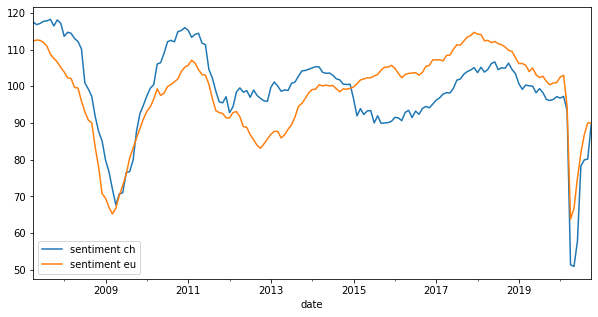

In [357]:
df_eco_raw.plot(figsize =(10,5))
plt.show()

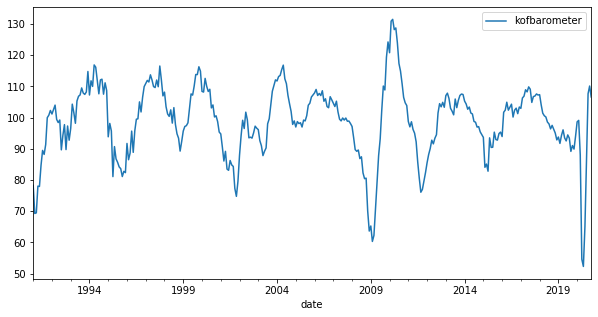

In [358]:
df_baro_raw.plot(figsize =(10,5))
plt.show()

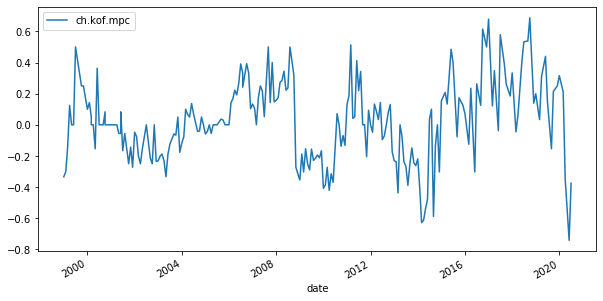

In [359]:
df_mcp_raw.plot(figsize =(10,5))
plt.show()

## Data expension

In [395]:
def expand_data(dt):
    
    df = dt.copy()
    date = max(df.index)
    d = datetime.datetime.strptime(str(date), '%Y-%m-%d %H:%M:%S')
    date = date.replace(month = d.month + 1 , day = 1)
    
    df.loc[date] = np.nan
    dt = df.resample('D').last().ffill().copy()
    dt = dt.drop( date, axis = 0).copy()
    
    return dt
    

In [399]:
df_baro_clean = expand_data(df_baro_raw)

In [400]:
df_mcp_clean = expand_data(df_mcp_raw)

In [401]:
df_eco_clean = expand_data(df_eco_raw)